<a href="https://colab.research.google.com/github/Aisleiy/DL-nlp2025/blob/main/Preprocessing-me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Natural Language Processing


**Zipf Law and Basic Functions of nltk**

Feb 14, 2025

Zengchang Qin

zengchang.qin@gmail.com

In [1]:
import nltk
# Download the 'punkt' resource to enable tokenization
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')


# Word Tokenization
text = "Hello, how are you?"
tokens = nltk.word_tokenize(text)
print(tokens)  # Output: ['Hello', ',', 'how', 'are', 'you', '?']

# Character Tokenization
text = "hello"
char_tokens = list(text)
print(char_tokens)  # Output: ['h', 'e', 'l', 'l', 'o']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['Hello', ',', 'how', 'are', 'you', '?']
['h', 'e', 'l', 'l', 'o']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


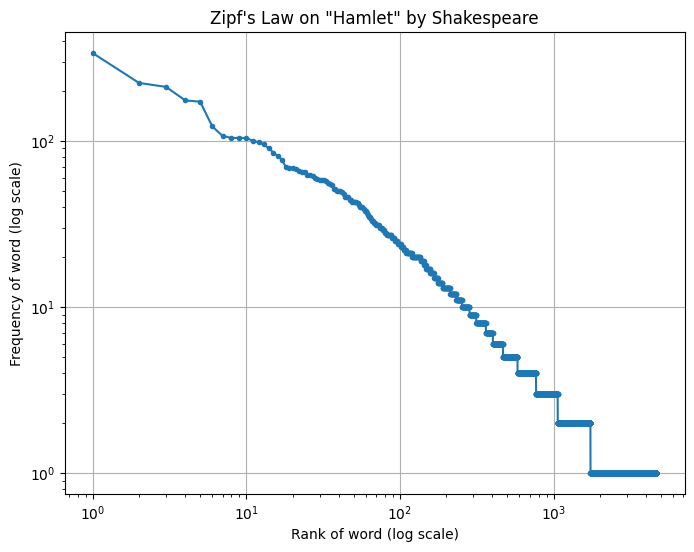

In [2]:
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
import string

# Ensure you have the necessary datasets and resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')

# Load 'Hamlet'
text = gutenberg.raw('shakespeare-hamlet.txt')

# Tokenize the text, convert to lower case, and remove punctuation
tokens = word_tokenize(text.lower())
tokens = [word for word in tokens if word not in string.punctuation]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count the frequency of each word
word_freq = Counter(tokens)

# Sort words by frequency
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
ranks = range(1, len(sorted_words) + 1)
frequencies = [freq for (word, freq) in sorted_words]

# Plot the data to show Zipf's law
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker=".")
plt.title('Zipf\'s Law on "Hamlet" by Shakespeare')
plt.xlabel('Rank of word (log scale)')
plt.ylabel('Frequency of word (log scale)')
plt.grid(True)
plt.show()


In [ ]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import treebank

sentence = "At Beihang University, students have been working so hard to pursue their dreams!"
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)

print(tokens)
print(entities)


['At', 'Beihang', 'University', ',', 'students', 'have', 'been', 'working', 'so', 'hard', 'to', 'pursue', 'their', 'dreams', '!']
(S
  At/IN
  (ORGANIZATION Beihang/NNP University/NNP)
  ,/,
  students/NNS
  have/VBP
  been/VBN
  working/VBG
  so/RB
  hard/JJ
  to/TO
  pursue/VB
  their/PRP$
  dreams/NN
  !/.)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


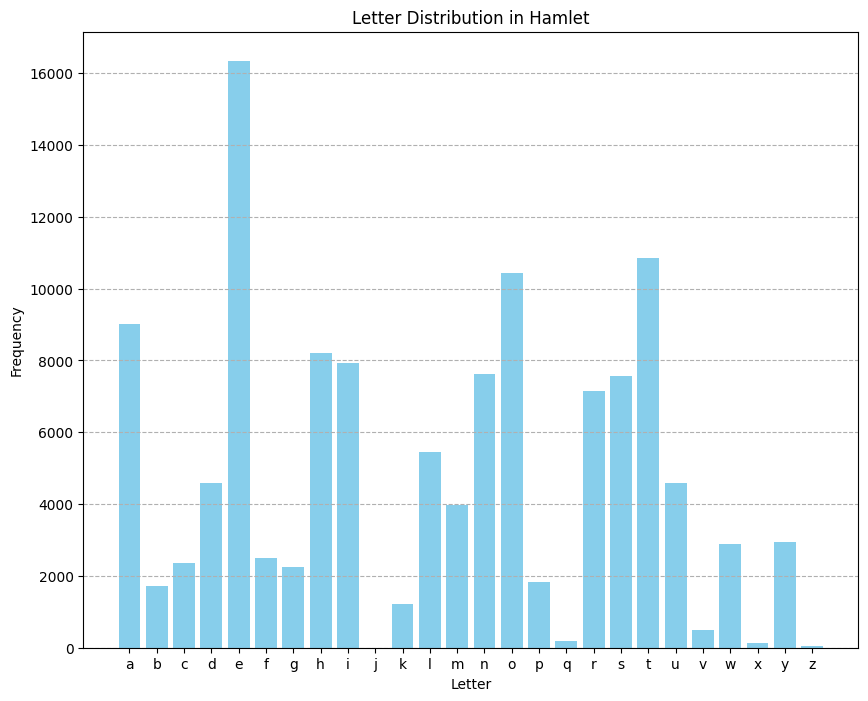

In [ ]:
import nltk
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
from collections import Counter
import string

# Step 1: Download NLTK Gutenberg corpus (do this only once)
nltk.download('gutenberg')

# Step 2: Load the text of Hamlet
hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')

# Step 3: Process the text
# Remove non-alphabetic characters and convert to lowercase
filtered_text = ''.join([char.lower() for char in hamlet_text if char.isalpha()])

# Count the frequency of each letter
letter_counts = Counter(filtered_text)

# Ensure we have all letters in the dataset, even if some have 0 count
all_letters = string.ascii_lowercase
final_counts = {letter: letter_counts.get(letter, 0) for letter in all_letters}

# Step 4: Plot the histogram
plt.figure(figsize=(10, 8))
plt.bar(final_counts.keys(), final_counts.values(), color='skyblue')
plt.title('Letter Distribution in Hamlet')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()



Scrambled letters without any difficulty in reading by keeping the first and the last letter fixed.


In [ ]:
import random

def scramble_words(text):
    """
    Scrambles the letters of each word in a given text, except for the first and last letters.
    """
    def scramble_word(word):
        if len(word) > 3:
            middle = list(word[1:-1])
            random.shuffle(middle)
            return word[0] + ''.join(middle) + word[-1]
        return word

    return ' '.join(scramble_word(word) for word in text.split())

# Example usage
text = " In order to study Deep Learning and Natural Language Processing, we have to start with mathematics like probability and statistics, linear algebra and calculus "
scrambled_text = scramble_words(text)
print(scrambled_text)


In order to sdtuy Deep Leinrnag and Nruaatl Lagagune Pcerosigsn, we have to sartt wtih mamttichaes like prtloibibay and ssascttiti, laeinr aerglba and caullcus
